In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [2]:
DF = pd.read_csv('Social_Network_Ads_2.csv')
DF

,Age,EstimatedSalary,Purchased
0,19,19000.0,0.0
1,35,20000.0,0.0
2,26,43000.0,0.0
3,27,57000.0,0.0
4,19,76000.0,0.0
...,...,...,...
395,46,41000.0,1.0
396,51,23000.0,1.0
397,50,20000.0,1.0
398,36,33000.0,0.0


In [3]:
DF.info()
# Kiểm tra thông tin Data Frame nhận được

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              400 non-null    int64  
 1   EstimatedSalary  397 non-null    float64
 2   Purchased        398 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


In [4]:
DF1 = DF.copy()
DF1['Purchased'].median()

# Copy data frame và xem xét một số thông tin,
# Quyết định lấy giá trị để xử lý missing data cho cột Purchased là median 
# bởi vì giá trị trung bình của cột thông tin này sẽ không phải 0 hoặc 1

0.0

In [5]:
imputerSalary = SimpleImputer(missing_values=np.NaN, strategy='mean')
imputerPurchased = SimpleImputer(missing_values=np.NaN, strategy='median')
# Sử dụng Simple Imputer để xử lý missing data

In [6]:
DF1[['EstimatedSalary']] = imputerSalary.fit_transform(DF1[['EstimatedSalary']])
DF1[['Purchased']] = imputerPurchased.fit_transform(DF1[['Purchased']])
DF1.info()

#Xử lý missing data và kiểm tra lại thông tin

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              400 non-null    int64  
 1   EstimatedSalary  400 non-null    float64
 2   Purchased        400 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


In [7]:
DF1['Purchased'].replace(1.0, 'Đã mua', inplace=True)
DF1['Purchased'].replace(0.0, 'Chưa mua', inplace=True)
# Thay thế các giá trị 1.0 thành Đã mua và 0.0 thành Chưa mua

DF1 = DF1.rename(columns={'Purchased': 'Status'})
#Đổi tên cột Purchased thành cột Status

DF1

,Age,EstimatedSalary,Status
0,19,19000.0,Chưa mua
1,35,20000.0,Chưa mua
2,26,43000.0,Chưa mua
3,27,57000.0,Chưa mua
4,19,76000.0,Chưa mua
...,...,...,...
395,46,41000.0,Đã mua
396,51,23000.0,Đã mua
397,50,20000.0,Đã mua
398,36,33000.0,Chưa mua


In [8]:
DF1.info()
# Check lại thông tin

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              400 non-null    int64  
 1   EstimatedSalary  400 non-null    float64
 2   Status           400 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 9.5+ KB


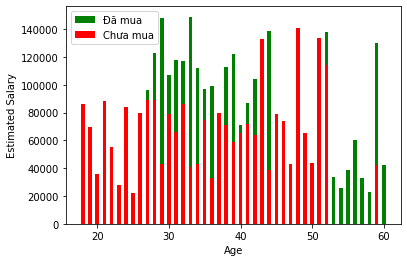

In [9]:
Buyed = {row['Age']: row['EstimatedSalary'] for i, row in DF1.iterrows() if row['Status'] == 'Đã mua'}
notBuyedYet = {row['Age']: row['EstimatedSalary'] for i, row in DF1.iterrows() if row['Status'] == 'Chưa mua'}
# Tách lấy thông tin riêng cho Đã mua và Chưa mua

width = 0.5
plt.bar(Buyed.keys(), Buyed.values(), width, color='g', label='Đã mua')
plt.bar(notBuyedYet.keys(), notBuyedYet.values(), width, color='r', label='Chưa mua')
# Vẽ biểu đồ cột cho 2 loại Đã mua và Chưa mua cùng với màu tương ứng

plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()

Text(0, 0.5, 'Estimated Salary')

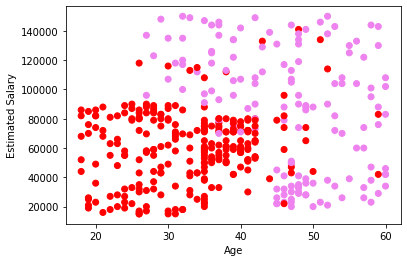

In [10]:
color = np.array(['violet' if status == 'Đã mua' else 'red' for status in DF1['Status']])
# Tạo mảng màu cho Trạng thái đã mua hoặc Chưa mua tương ứng

plt.scatter(DF1['Age'].values, DF1['EstimatedSalary'].values, c=color)
# Vẽ biểu đồ scatter dựa trên giá trị của Tuổi và Lương cùng với màu là mảng màu đã tạo ở trên

plt.xlabel('Age')
plt.ylabel('Estimated Salary')